In [14]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.seasonal as smts
import pandas as pd
from statsmodels.tsa.stattools import adfuller

plt.style.use('seaborn')

Name: Keshav Aggarwal
Roll Number: QE2113

# Quiz 3

In [2]:
time = np.arange(100)
ut = np.random.normal(size=110)

Creating the time series process from the given parameters

In [11]:
yt = []
yt.append(0)
for i in range(1,100):
    yt.append(1.5*time[i] + 0.5*yt[i-1] + ut[i])

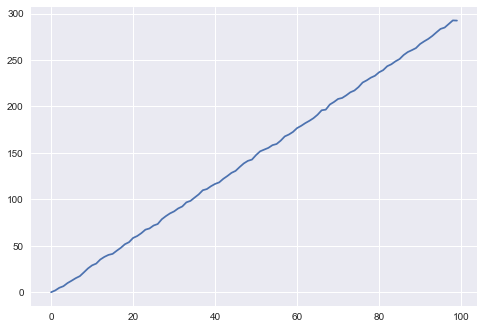

In [12]:
plt.plot(time,yt)

In [17]:
adfuller(yt,regression="n",)

(0.07257556099141257,
 0.7078942746411533,
 11,
 88,
 {'1%': -2.5916151807851238,
  '5%': -1.944440985689801,
  '10%': -1.614115063626972},
 264.4027331507218)

Running the OLS with one independent variable t

In [25]:
T

,const,time,Yt-1
0,1.0,0,0.000000
1,1.0,1,1.898662
2,1.0,2,4.772926
3,1.0,3,6.474889
4,1.0,4,9.841429
...,...,...,...
94,1.0,94,279.786957
95,1.0,95,283.477411
96,1.0,96,284.927715
97,1.0,97,288.771054


In [24]:
T = sm.add_constant(pd.DataFrame({'time':time[:-1],"Yt-1":yt[:-1]}))
linear_model = sm.OLS(yt[1:],T).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.434e+05
Date:                Sun, 08 May 2022   Prob (F-statistic):          4.49e-191
Time:                        13:21:25   Log-Likelihood:                -128.80
No. Observations:                  99   AIC:                             263.6
Df Residuals:                      96   BIC:                             271.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4388      0.283      5.083      0.0

Residual sum of squares

In [46]:
np.sum(np.square(linear_model.resid))

154.45784743694472

OLS with quadratic trend

In [47]:
T_sq = pd.DataFrame(T,columns=['const','t'],)
T_sq['t^2'] = T_sq['t']**2
sq_model = sm.OLS(yt,T_sq).fit()
print(sq_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.544e+05
Date:                Tue, 12 Apr 2022   Prob (F-statistic):          3.85e-181
Time:                        14:55:04   Log-Likelihood:                -159.63
No. Observations:                 100   AIC:                             325.3
Df Residuals:                      97   BIC:                             333.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1150      0.357      0.323      0.7

Residual sum of squares in Quadratic trend

In [48]:
np.sum(np.square(sq_model.resid))

142.58124443800176

Trend using moving average

In [53]:
Tt = pd.Series(yt).rolling(5).mean()[4:]

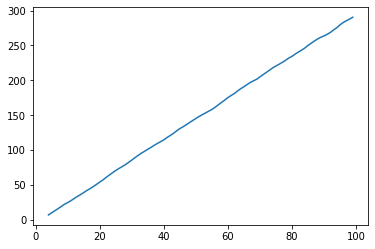

In [60]:
plt.plot(Tt)

In [58]:
Residuals = yt[2:-2]-Tt

In [59]:
np.sum(np.square(Residuals))

68.19120529930805